In [3]:
# Import Libraries
import datetime
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
def filetoList(saleFile, ReturnFile, return_list, saleWReturn):
    """
    This function takes in the returns File and makes it into a list, then takes the sales File and makes that into a list without the returns.
    Inputs: 
        SaleFile - Sales File
        ReturnFile - Returns File
        return_list - The first line of the Returns File made into a list.
        saleWReturn - The Sales File without removing the returns.
    Returns: sales_list - Sale's list without the Returns.
    """
    sales_list = []
    with open(ReturnFile, "r") as file:
        for line in file:
            return_list.append(line.strip().split(",")[0])
    with open(saleFile, "r") as file1:
        for line in file1:
            data = line.strip().split(",")
            saleWReturn.append(data)
            if data[0] not in return_list:
                sales_list.append(data)
    return sales_list

def filetodict(filename, n1, n2):
    """
    This function takes a file splits each line with a comma, then takes 2 index's n1, n2 and it makes n1 the keys and
    n2 the value to a dictionary and returns the dictionary. 
    Input: 
        filename - The name of the file
        n1 - Key 
        n2 - Value
    Returns: outputDict - Dictionary 
    """
    outputDict = {}
    with open(filename, "r") as file:
        for line in file:
            line = line.strip().split(",")
            key = line[n1]
            value = line[n2]
            outputDict[key] = value
    return outputDict

In [ ]:
# Variables that are useful to code
returnList = []
saleWReturn = []
Sales_list = filetoList("transactions_Sales.csv", "transactions_Returns.csv", returnList, saleWReturn)
productdict1 = filetodict("transactions_Products.csv", 0, 2)    
productdict2 = filetodict("transactions_Products.csv", 0, 1)
returnDict = filetodict("transactions_Returns.csv", 0, 1)
returnList.pop(0)
saleWReturn.pop(0)
productdict1.pop('Product_ID')
productdict2.pop('Product_ID')

'Product_Name'

In [ ]:
# List of the data before the 8th and after the 8th
sale_before = []
sale_after = []
for i in range(len(saleWReturn)):
    date = saleWReturn[i][1]
    day = int(date[8:])
    if day < 8:
        sale_before.append(saleWReturn[i])
    else:
        sale_after.append(saleWReturn[i])

def avg_discount(product_id, sales_list):
    """
    This function calculates the average discount per product.
    Input:
        product_id - The id of the product.
        sales_list - The list which we collect the data from.
    Return: Average
    """
    total_discount = 0
    count = 0
    average = 0
    for sale in sales_list:
        if sale[2] == product_id:
            total_discount += float(sale[4]) * float(sale[3])
            count += (1 * int(sale[3]))
            average = (total_discount / count) * 100
    return average

def avg_without_discount(sales_list):
    """
    This function calculates the average transactions without discounts.
    Input:
        sales_list - The list which we collect the data from.
    Return: Average
    """
    count = 0
    for sale in sales_list:
        if float(sale[4]) == 0:
            count += 1
    average = (count / len(sales_list)) * 100
    return average

# Calculate average transaction without discount before and after January 8th
avg_wout_before = avg_without_discount(sale_before)
avg_wout_after = avg_without_discount(sale_after)

# Output
print(f"Average transaction without discount: {avg_wout_before:.2f}% - {avg_wout_after:.2f}%")
print("Average discount per product:")
for product_id in productdict1.keys():
    product_name = productdict2.get(product_id, "")
    avg_discount_before = avg_discount(product_id, sale_before)
    avg_discount_after = avg_discount(product_id, sale_after)
    print(f"{product_id:>3}                            {product_name:>20} {avg_discount_before:05.2f}% - {avg_discount_after:05.2f}%")

Average transaction without discount: 3.38% - 3.90%
Average discount per product:
 P1                                   2-in-1 Laptop 09.88% - 06.90%
 P2                                     Game Laptop 07.45% - 07.59%
 P3                                    Titan Laptop 09.29% - 06.91%
 P4                              Folding Smartphone 09.06% - 07.25%
 P5                                Smart Smartphone 09.10% - 07.50%
 P6                                    T headphones 10.16% - 08.31%
 P7                             Cordless Headphones 07.29% - 07.22%
 P8                                   "13"" Tablet" 10.09% - 06.68%
 P9                                    e-ink Tablet 10.09% - 06.69%
P10                                   "10"" Tablet" 10.14% - 07.75%
P11                                  Colour Printer 10.28% - 06.91%
P12                                   Laser Printer 09.59% - 07.47%
P13                                        Mega MP3 09.58% - 07.04%
P14                               

+-----------+-----+-------------+
| Day       |NB Tr|    Turnover |
+-----------+-----+-------------+
|Monday     | 64  |  $ 47,601.66|
+-----------+-----+-------------+
|Tuesday    | 71  |  $ 55,074.94|
+-----------+-----+-------------+
|Wednesday  | 65  |  $ 47,543.33|
+-----------+-----+-------------+
|Thursday   | 74  |  $ 50,420.02|
+-----------+-----+-------------+
|Friday     | 74  |  $ 58,183.97|
+-----------+-----+-------------+
|Saturday   | 75  |  $ 52,811.26|
+-----------+-----+-------------+
|Sunday     | 73  |  $ 62,234.42|
+-----------+-----+-------------+


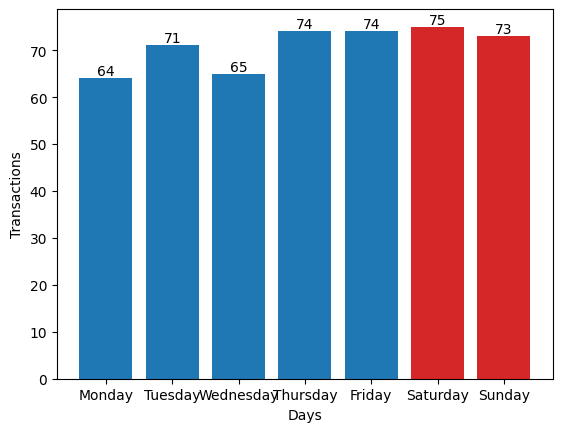

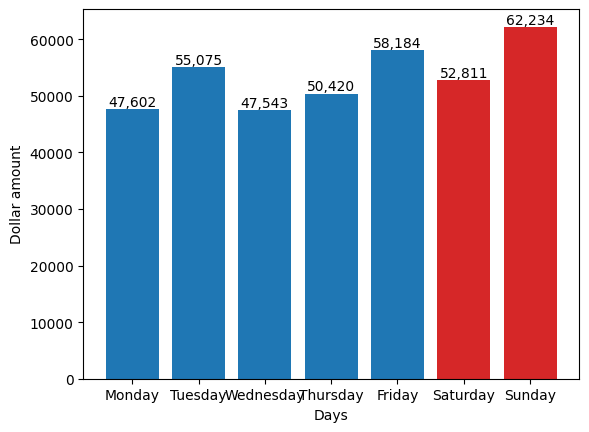

In [ ]:
# List and dictionaries useful to store different values given the same key
week_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
transactions_amount = {day: 0 for day in week_list}
sale_amount = {day: 0 for day in week_list}
day_in_month = {day: 0 for day in week_list}

# Creating the dictionaries with the total amount of weekdays and the total sale amount
reshelfList = []
day_list = []
for sale in saleWReturn:
    transaction_Id = sale[0]
    date = sale[1]
    quantity = sale[3]
    discount = sale[4]
    product = sale[2]
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:])
    weekday = datetime.datetime(year, month, day).strftime("%A")
    transactions_amount[weekday] += 1
    sale_amount[weekday] += float(quantity) * (1 - float(discount)) * float(productdict1[product])

    if date not in day_list:
        day_list.append(date)

    if transaction_Id in returnList:
        reshelfList.append(sale)    

# Dictionary with how many each weekday is in the month 
for data in day_list:
    year = int(data[:4])
    month = int(data[5:7])
    day = int(data[8:])
    weekday = datetime.datetime(year, month, day).strftime("%A")
    day_in_month[weekday] += 1

# Calculating Average
avg_transAc_amount = {day : round(total / day_in_month[day]) for day, total in transactions_amount.items()}
avg_sale_amount = {day : round(total / day_in_month[day], 2) for day, total in sale_amount.items()}

# Output
print("+-----------+-----+-------------+")
print("| Day       |NB Tr|    Turnover |")
print("+-----------+-----+-------------+")
for day in week_list:
    avg_transactions = avg_transAc_amount[day]
    turnover = avg_sale_amount[day]
    print(f"|{day:9}  |{avg_transactions:3d}  |  ${turnover:10,.2f}|")
    print("+-----------+-----+-------------+")

bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red']
myBars = plt.bar(week_list, height=list(avg_transAc_amount.values()), color=bar_colors)
plt.xlabel('Days')
plt.ylabel('Transactions')
plt.bar_label(myBars)
plt.show()
myBars2 = plt.bar(week_list, height=list(avg_sale_amount.values()), color=bar_colors)
plt.xlabel('Days')
plt.ylabel('Dollar amount')
plt.bar_label(myBars2, fmt='{:,.0f}')
plt.show()

In [ ]:
# Dictionary with the returns data and the value as the shelving cost.
shelving_Dict = {}
for data in reshelfList:
    transaction_Id = data[0]
    product = data[2]
    quantity = float(data[3])
    date = returnDict[transaction_Id]
    price = float(productdict1.get(product, 0))
    shelf_cost = price * 0.1 * quantity

    if date in shelving_Dict:
        shelving_Dict[date] += shelf_cost
    else:
        shelving_Dict[date] = shelf_cost

shelving_Dict = dict(sorted(shelving_Dict.items(), key=lambda item: item[1], reverse=True))

key_list = list(shelving_Dict.keys())
day_in_month = key_list[0]
year = int(day_in_month[:4])
month = int(day_in_month[5:7])
day = int(day_in_month[8:])
weekday = datetime.datetime(year, month, day).strftime("%A")
theMonth = datetime.datetime(year, month, day).strftime("%B")

# Output
print(f"{weekday}, {theMonth}, {day}, {year} Total Return Shelving(RS) Cost=${shelving_Dict[day_in_month]:,.2f}")
print(f"Products returned that day:")
for data in reshelfList:
    transaction_Id = data[0]
    data[1] = returnDict[transaction_Id]
    date = data[1]
    product = data[2]
    quantity = float(data[3])
    price = float(productdict1.get(product, 0))
    name = productdict2.get(product, "")
    shelf_cost = price * 0.1 * quantity

    if date == day_in_month:
        print(f"{product:3}         {name:20}{quantity:3.0f} ${shelf_cost:10,.2f}")

Monday, January, 29, 2024 Total Return Shelving(RS) Cost=$1,380.00
Products returned that day:
P17         Camera TocTic         6 $     90.00
P18         Multidirectional mic  1 $     20.00
P2          Game Laptop           1 $    200.00
P1          2-in-1 Laptop         3 $    450.00
P2          Game Laptop           1 $    200.00
P3          Titan Laptop          2 $    420.00


In [ ]:
# Creating a dictionary with the number of items sold per product
salesDict = {}
for i in range(len(Sales_list)):
    product = Sales_list[i][2]
    quantity = int(Sales_list[i][3])
    salesDict[product] = salesDict.get(product, 0) + quantity

salesDict = dict(sorted(salesDict.items(), key=lambda item: int(item[0][1:])))

# Writing the output into a file
with open("order_supplier_January.txt", "w") as file:
    output = ""
    for key, value in salesDict.items():
        output = f"{key}#{productdict2[key]}#{salesDict[key]}\n"
        file.write(output)

In [ ]:
key_list = list(salesDict.keys())
value_list = list(salesDict.values())
list_of_dates = []
# Finding the days with the least number of units sold and appending those dates into a list
for key, value in salesDict.items():
    if value == 0:
        print(f"{key:>3} {productdict2[key]:<20}")
    else:
        for data in Sales_list:
            sold_least = min(value_list)
            position = value_list.index(sold_least)
            product = data[2]
            data[1] = data[1].replace("-", "/")
            date = data[1]
            if key_list[position] == product:
                if date not in list_of_dates:
                    list_of_dates.append(date)

# Appending the output into a list and then printing the first index so the output does not repeat. 
output = []
for key, value in salesDict.items():
    if value != 0:
        position = value_list.index(sold_least)
        output.append(f"{key_list[position]:3} {productdict2[key_list[position]]:<20}{salesDict[key_list[position]]} {list_of_dates}\n")
print(output[0])

P17 Camera TocTic       109 ['2024/01/08', '2024/01/09', '2024/01/10', '2024/01/11', '2024/01/12', '2024/01/13', '2024/01/14', '2024/01/15', '2024/01/16', '2024/01/17', '2024/01/18', '2024/01/19', '2024/01/20', '2024/01/21', '2024/01/22', '2024/01/24', '2024/01/25', '2024/01/26', '2024/01/27', '2024/01/28', '2024/01/29', '2024/01/30', '2024/01/31']



Pearson Correlation= -0.134


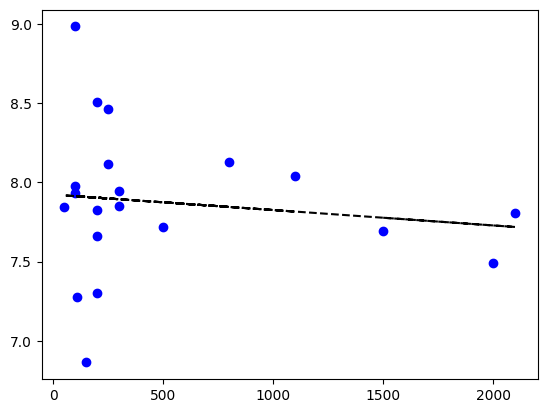

In [ ]:
for key, value in productdict1.items():
    productdict1[key] = int(value)

list_of_prices = list(productdict1.values())
avg_discount_list = []
for keys in productdict1.keys():
    average_discount = avg_discount(keys, Sales_list)
    avg_discount_list.append(average_discount)

# Output
r= np.corrcoef(list_of_prices,avg_discount_list)
print (f"Pearson Correlation= {r[0,1]:.3f}")
coef=np.polyfit(list_of_prices,avg_discount_list,1)
poly1d_fn=np.poly1d(coef)
plt.plot(list_of_prices,avg_discount_list, 'bo', list_of_prices, poly1d_fn(list_of_prices), '--k')
plt.show()